In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

## Generate Dataset 

In [39]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import pandas as pd
import numpy as np

# generate 2d classification dataset
X, y = make_blobs(n_samples=6000, centers=5, n_features=10)


X = np.array(X)
y = np.array(y)
d = np.concatenate((X, y),axis=-1)
d.shape

#dataset = pd.DataFrame({'X': y, 'y': list(X)}, columns=['y', 'X'])

# print(dataset.shape)
dataset.head()
# print(X.shape[1])


# # scatter plot, dots colored by class value
# df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
# df.head()
# # colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'cyan'}
# # fig, ax = pyplot.subplots()
# # grouped = df.groupby('label')
# # for key, group in grouped:
# #     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# # pyplot.show()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=100)
kmeans.fit(df)

KMeans(init='random', max_iter=100, n_clusters=4)

In [6]:
kmeans.cluster_centers_

array([[ 4.33409110e+00,  1.28559322e+01,  5.66079775e+00,
         1.07542145e+00,  7.69989407e+03,  1.19278970e+01,
         3.52119915e+01, -1.19074492e+02,  2.03824589e+00],
       [ 3.91943712e+00,  3.16238581e+01,  5.63276041e+00,
         1.12300383e+00,  7.86889756e+02,  2.79776960e+00,
         3.58498741e+01, -1.19744857e+02,  2.11187696e+00],
       [ 3.78687364e+00,  2.66763325e+01,  5.18348251e+00,
         1.06335472e+00,  1.70920671e+03,  3.06838456e+00,
         3.54230655e+01, -1.19419477e+02,  2.01580424e+00],
       [ 3.84293143e+00,  2.03158453e+01,  5.12477609e+00,
         1.06989539e+00,  3.36746582e+03,  3.60214393e+00,
         3.51830525e+01, -1.19161638e+02,  2.01597642e+00]])

In [7]:
kmeans.n_iter_

38

In [8]:
kmeans.labels_

array([1, 2, 1, ..., 1, 1, 2])

In [21]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df)
kmeans1 = KMeans(init="k-means++",n_clusters=3,n_init=10,max_iter=100)
label = kmeans1.fit_predict(df)

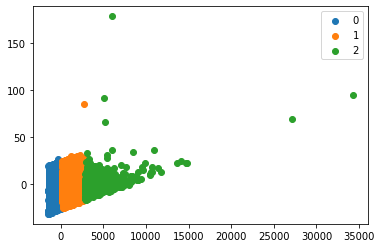

In [22]:
u_labels = np.unique(label)
 
#Visualization
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

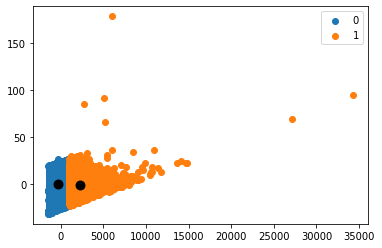

In [12]:
centroids = kmeans1.cluster_centers_
u_labels = np.unique(label)
 

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

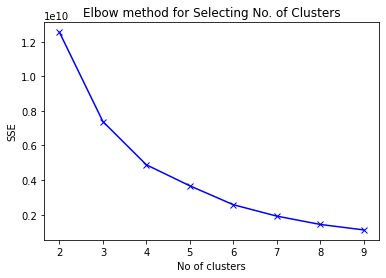

In [14]:
SSE =[]
for i in range(2, 10):
    kmeans = KMeans(init="k-means++",n_clusters=i,n_init=10,max_iter=100)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(2, 10), SSE, 'bx-')
plt.title('Elbow method for Selecting No. of Clusters')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()